# **Xử lý dữ liệu**

**Thêm thư viện**

In [35]:
import pandas as pd
import statistics as sta
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

**Đọc dữ liệu từ file csv và in ra vài dòng đầu**

In [36]:
csv = "output.csv"
data = pd.read_csv(csv)

**Xử lý và chuyển giá sản phẩm thành dạng số thực**

In [37]:
price = data["p_price"]
new_price = []
for item in price:
    item = str(item)
    if "." in item:
        item = item.replace(".","") # Xóa dấu chấm trong giá tiền
    if item[-1]=="₫":   # Xóa kí tự ₫ trong giá tiền
        item = item.replace("₫","")
    item = item.strip()     # Loại bỏ khoảng trắng trước và sau giá tiền
    new_price.append(int(item))   # Chuyển giá tiền về kiểu dữ liệu số nguyên
data["p_price"] = new_price

**Lọc và phân chia các khoảng giá tiền của sản phẩm**

In [38]:
price_cate = data["p_price"]
# Phân loại và thống kê giá trị của các sản phẩm
list_cate = ["Sản phẩm có giá từ 0 - dưới 10k","Sản phẩm có giá từ 10k - dưới 100k","Sản phẩm có giá từ 100k - dưới 1tr","Sản phẩm có giá từ 1tr - 10tr","Sản phẩm có giá từ trên 10tr"]
count_list_cate = [0, 0, 0, 0, 0]
percent = []
for item in price_cate:
    if item<10000:
        count_list_cate[0] = count_list_cate[0] +1
    elif item<100000:
        count_list_cate[1] = count_list_cate[1] +1
    elif item<1000000:
        count_list_cate[2] = count_list_cate[2] +1
    elif item<10000000:
        count_list_cate[3] = count_list_cate[3] +1
    else:
        count_list_cate[4] = count_list_cate[4] +1
# Tính phần trăm
for item in count_list_cate:
    item = item/len(price_cate)*100
    percent.append(round(item))

**Hàm tạo bảng thống kê và vẽ Barplot**

In [39]:
def stat_table(a,title_plt):
    x = data.groupby(a)[a].count()
    dt = pd.DataFrame(x)
    dt.columns = ['Percent']
    percent = []
    for i in dt['Percent']:
        x = (i/len(data[a]))*100
        percent.append(round(x))
    dt['Percent'] = percent
    print(dt)
    mylabels = dt.index
    fig = plt.figure(figsize = (3, 6))
    # Barplot
    plt.title(title_plt, fontsize = 20, color = 'red')
    sns.barplot(percent, mylabels, data = dt, orient = 'h')

**Hàm vẽ khoảng giá tiền sản phẩm**

Lấy lại từ stat_table và được điều chỉnh lại

In [40]:
def khoang_gia_tien_san_pham(percent, list_cate):
    price_df = pd.Series(percent, index=list_cate) # Tạo dataframe với 2 cột là tên danh mục và phần trăm các khoảng tiền
    print(price_df)
    mylabels = price_df.index
    fig = plt.figure(figsize = (4, 4))
    plt.title('Các khoảng giá tiền của các sản phẩm', fontsize = 20, color = 'red')
    sns.barplot(price_df, mylabels, orient = 'h')

# **Kết quả thống kê**

**Tổng quan về file csv**

In [41]:
data.head(3)

,p_1star_rating,p_2star_rating,p_3star_rating,p_4star_rating,p_5star_rating,p_cate,p_image,p_mall,p_name,p_number_reviews,p_price,p_rating,s_name,s_rating,s_response_rate,s_ship_ontime
0,0,2,1,6,107,Giày dép & Quần áo nam,//vn-live-05.slatic.net/p/0e4c09315f597b7fe369...,Mall,DIRTYCOINS Graffitee T-shirt,116 đánh giá,350000,4.9,Dirty Coins,97%,100%,100%
1,0,0,0,0,2,Giày dép & Quần áo nam,//vn-live-05.slatic.net/p/2b6161b40fdae6653483...,Non-Mall,[HCM][Voucher 10%] Áo thun Teeworld Saigonese ...,2 đánh giá,201000,5.0,Teeworld Fashion - Thế Giới Áo Thun,92%,100%,100%
2,0,0,0,0,5,Điện thoại & Máy tính bảng,//vn-live-05.slatic.net/p/313c4773ce20ffc45c30...,Non-Mall,Điện thoại Iphone X 64g - 256g quốc tế mới 98%,5 đánh giá,4444310,5.0,ShopcongngheHT,88%,97%,100%


**Thống kê các danh mục sản phẩm**

                                 Percent
p_cate                                  
Bếp & Phòng ăn                        12
Electronics Accessories               12
Giày dép & Quần áo nam                50
Văn phòng phẩm và nghề thủ công       12
Điện thoại & Máy tính bảng            12


C:\Users\lybuu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


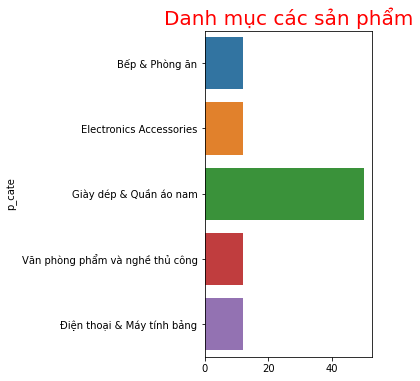

In [42]:
stat_table("p_cate", "Danh mục các sản phẩm")

**Thống kê giá sản phẩm**

Sản phẩm có giá từ 0 - dưới 10k       12
Sản phẩm có giá từ 10k - dưới 100k    12
Sản phẩm có giá từ 100k - dưới 1tr    50
Sản phẩm có giá từ 1tr - 10tr         12
Sản phẩm có giá từ trên 10tr          12
dtype: int64


C:\Users\lybuu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


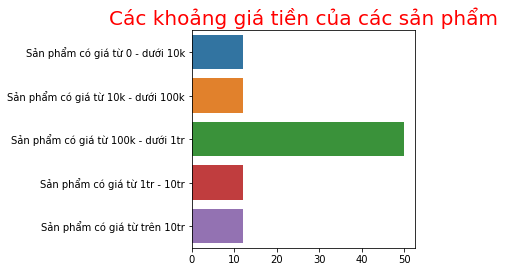

In [43]:
khoang_gia_tien_san_pham(percent, list_cate)

          Percent
p_mall           
Mall           38
Non-Mall       62


C:\Users\lybuu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


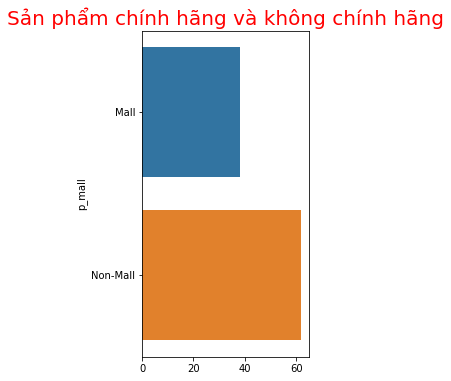

In [44]:
stat_table("p_mall","Sản phẩm chính hãng và không chính hãng")